In [3]:
import gym
import torch
import torch.nn as nn
import numpy as np
from lib import wrappers_skips
from lib import dqn_model
import collections
import argparse
import time
import cv2
import gym.spaces
import collections

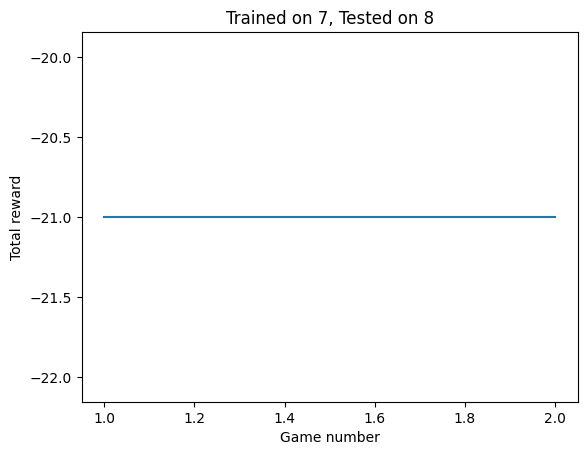

In [20]:
import matplotlib.pyplot as plt

env = wrappers_skips.make_env("PongNoFrameskip-v4", 3)
env.seed(42)
net = dqn_model.DQN(env.observation_space.shape, env.action_space.n)
net.load_state_dict(torch.load('C:/NEURO140/Final/PongNoFrameskip-v4-skip3.dat', map_location=lambda storage, loc: storage))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('test.mp4', fourcc, 60.0, (env.render(mode='rgb_array').shape[1], env.render(mode='rgb_array').shape[0]))

n = 2  # number of games to play
total_rewards = []  # list to store the total reward obtained in each game

for i in range(n):
    state = env.reset()
    total_reward = 0.0
    done = False
    obs = env.reset()
    while not done:
        action = net(torch.tensor([obs])).argmax(dim=1).item()
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        out.write(env.render(mode='rgb_array'))
    
    total_rewards.append(total_reward)

# Release the VideoWriter object
out.release()
cv2.destroyAllWindows()

# Plot the reward as a function of games played
plt.plot(range(1, n+1), total_rewards)
plt.xlabel('Game number')
plt.ylabel('Total reward')
plt.title("Trained on 7, Tested on 8")
plt.show()


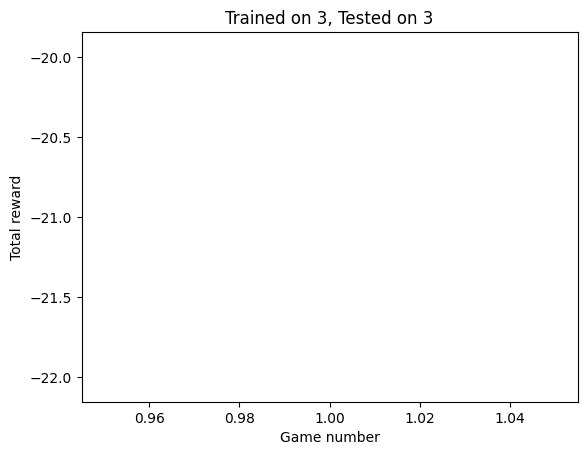

In [35]:
import matplotlib.pyplot as plt

env = wrappers_skips.make_env("PongNoFrameskip-v4", 2)
# env.seed(42)
net = dqn_model.DQN(env.observation_space.shape, env.action_space.n)
net.load_state_dict(torch.load('C:/NEURO140/Final/PongNoFrameskip-v4-skip3.dat', map_location=lambda storage, loc: storage))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('tesyt.mp4', fourcc, 60.0, (env.render(mode='rgb_array').shape[1], env.render(mode='rgb_array').shape[0]))

n = 1  # number of games to play
total_rewards = []  # list to store the total reward obtained in each game

for i in range(n):
    state = env.reset()
    total_reward = 0.0
    done = False
    obs = env.reset()
    # env.seed(i)  # seed the environment with game number i
    
    while not done:
        action = net(torch.tensor([obs])).argmax(dim=1).item()
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        out.write(env.render(mode='rgb_array'))
    
    total_rewards.append(total_reward)

# Release the VideoWriter object
out.release()
cv2.destroyAllWindows()

# Plot the reward as a function of games played
plt.plot(range(1, n+1), total_rewards)
plt.xlabel('Game number')
plt.ylabel('Total reward')
plt.title("Trained on 3, Tested on 3")
plt.show()


In [8]:
import torch
import collections
import numpy as np

def play_games(model_path: str, frame_skips: list, num_games: int) -> list:
    env_rewards = []
    for skip in frame_skips:
        env = wrappers_skips.make_env("PongNoFrameskip-v4", skip)
        env.seed(42)
        net = dqn_model.DQN(env.observation_space.shape, env.action_space.n)
        net.load_state_dict(torch.load(model_path.format(skip), map_location=lambda storage, loc: storage))
        
        total_rewards = []
        for i in range(num_games):
            obs = env.reset()
            done = False
            total_reward = 0.0
            while not done:
                obs_v = torch.tensor([obs])
                q_v = net(obs_v)
                act_v = q_v.argmax(dim=1)
                action = int(act_v.item())
                obs, reward, done, _ = env.step(action)
                total_reward += reward
            total_rewards.append(total_reward)
        mean_reward = np.mean(total_rewards)
        env_rewards.append(mean_reward)
    return env_rewards

model_pattern = "PongNoFrameskip-v4-skip{}.dat"
frame_skips = [1, 2, 3, 4, 5, 6, 7, 8, 9]
models_to_test = [3, 5, 9]
num_games = 1

print("Model\t\tFrame Skip\tMean Reward")
for skip in frame_skips:
    for model in models_to_test:
        model_path = model_pattern.format(model)
        model_rewards = play_games(model_path, [skip], num_games)
        mean_reward = model_rewards[0]
        print(f"Model {model}\t\t{skip}\t\t{mean_reward:.2f}")


Model		Frame Skip	Mean Reward
Model 3		1		-21.00
Model 5		1		-19.00
Model 9		1		-21.00
Model 3		2		-8.00
Model 5		2		-18.00
Model 9		2		-21.00
Model 3		3		20.00
Model 5		3		4.00
Model 9		3		-21.00
Model 3		4		-21.00
Model 5		4		21.00
Model 9		4		-21.00
Model 3		5		-20.00
Model 5		5		-19.00
Model 9		5		-20.00
Model 3		6		-20.00
Model 5		6		-21.00
Model 9		6		-21.00
Model 3		7		-21.00
Model 5		7		-20.00
Model 9		7		-21.00
Model 3		8		-21.00
Model 5		8		-18.00
Model 9		8		-21.00
Model 3		9		-21.00
Model 5		9		-13.00
Model 9		9		19.00


Model PongNoFrameskip-v4-skip3.dat with frame skip 1: -21.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 2: -8.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 3: 20.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 4: -21.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 5: -20.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 6: -20.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 7: -21.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 8: -21.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 9: -21.00
Model PongNoFrameskip-v4-skip5.dat with frame skip 1: -19.00
Model PongNoFrameskip-v4-skip5.dat with frame skip 2: -18.00
Model PongNoFrameskip-v4-skip5.dat with frame skip 3: 4.00
Model PongNoFrameskip-v4-skip5.dat with frame skip 4: 21.00
Model PongNoFrameskip-v4-skip5.dat with frame skip 5: -19.00
Model PongNoFrameskip-v4-skip5.dat with frame skip 6: -21.00
Model PongNoFrameskip-v4-skip5.dat with frame skip 7: -20.00
Model PongNoFrameskip-v4-skip

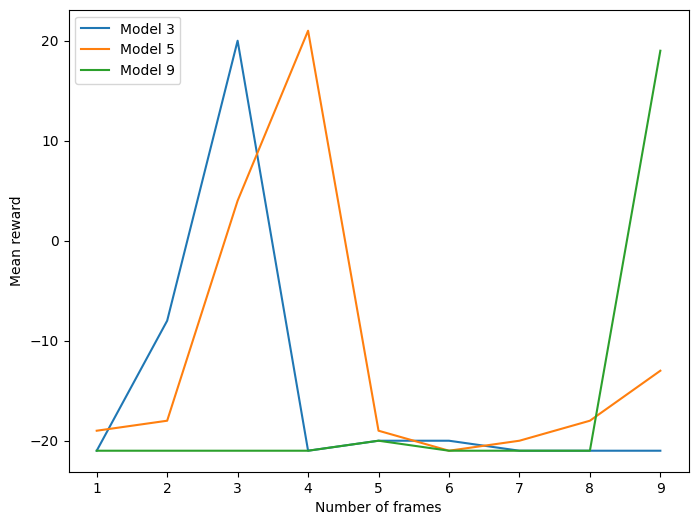

In [11]:
import torch
import collections
import numpy as np
import matplotlib.pyplot as plt

def play_games(model_path: str, frame_skips: list, num_games: int) -> list:
    env_rewards = []
    for skip in frame_skips:
        env = wrappers_skips.make_env("PongNoFrameskip-v4", skip)
        env.seed(42)
        net = dqn_model.DQN(env.observation_space.shape, env.action_space.n)
        net.load_state_dict(torch.load(model_path.format(skip), map_location=lambda storage, loc: storage))
        
        total_rewards = []
        for i in range(num_games):
            obs = env.reset()
            done = False
            total_reward = 0.0
            while not done:
                obs_v = torch.tensor([obs])
                q_v = net(obs_v)
                act_v = q_v.argmax(dim=1)
                action = int(act_v.item())
                obs, reward, done, _ = env.step(action)
                total_reward += reward
            total_rewards.append(total_reward)
        mean_reward = np.mean(total_rewards)
        env_rewards.append(mean_reward)
        print(f"Model {model_path} with frame skip {skip}: {mean_reward:.2f}")
        
    return env_rewards

model_pattern = "PongNoFrameskip-v4-skip{}.dat"
frame_skips = [1, 2, 3, 4, 5, 6, 7, 8, 9]
models_to_test = [3, 5, 9]
num_games = 1

# Collect mean rewards for each model and frame skip value
mean_rewards = collections.defaultdict(list)
for model in models_to_test:
    model_path = model_pattern.format(model)
    model_rewards = play_games(model_path, frame_skips, num_games)
    for i, skip in enumerate(frame_skips):
        mean_reward = model_rewards[i]
        mean_rewards[model].append(mean_reward)

# Plot mean rewards for each model as a function of frame skip
plt.figure(figsize=(8, 6))
for model in models_to_test:
    plt.plot(frame_skips, mean_rewards[model], label=f"Model {model}")
plt.xlabel("Number of frames")
plt.ylabel("Mean reward")
plt.legend()
plt.show()


Model PongNoFrameskip-v4-skip3.dat with frame skip 1: -21.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 2: -8.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 3: 20.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 4: -21.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 5: -20.00
Model PongNoFrameskip-v4-skip4.dat with frame skip 2: -18.00
Model PongNoFrameskip-v4-skip4.dat with frame skip 3: 4.00
Model PongNoFrameskip-v4-skip4.dat with frame skip 4: 21.00
Model PongNoFrameskip-v4-skip4.dat with frame skip 5: -19.00
Model PongNoFrameskip-v4-skip4.dat with frame skip 6: -21.00
Model PongNoFrameskip-v4-skip9.dat with frame skip 7: -21.00
Model PongNoFrameskip-v4-skip9.dat with frame skip 8: -21.00
Model PongNoFrameskip-v4-skip9.dat with frame skip 9: 19.00
Model PongNoFrameskip-v4-skip9.dat with frame skip 10: -21.00
Model PongNoFrameskip-v4-skip9.dat with frame skip 11: -20.00


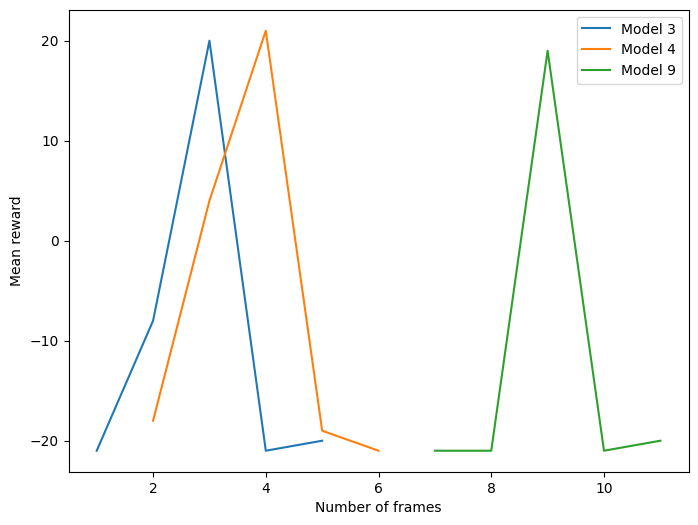

In [23]:
import torch
import collections
import numpy as np
import matplotlib.pyplot as plt

def play_games(model_path: str, frame_skips: list, num_games: int) -> list:
    env_rewards = []
    for skip in frame_skips:
        env = wrappers_skips.make_env("PongNoFrameskip-v4", skip)
        env.seed(42)
        net = dqn_model.DQN(env.observation_space.shape, env.action_space.n)
        net.load_state_dict(torch.load(model_path.format(skip), map_location=lambda storage, loc: storage))

        total_rewards = []
        for i in range(num_games):
            obs = env.reset()
            done = False
            total_reward = 0.0
            while not done:
                obs_v = torch.tensor([obs])
                q_v = net(obs_v)
                act_v = q_v.argmax(dim=1)
                action = int(act_v.item())
                obs, reward, done, _ = env.step(action)
                total_reward += reward
            total_rewards.append(total_reward)
        mean_reward = np.mean(total_rewards)
        env_rewards.append(mean_reward)
        print(f"Model {model_path} with frame skip {skip}: {mean_reward:.2f}")

    return env_rewards

model_pattern = "PongNoFrameskip-v4-skip{}.dat"
frame_skips = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
models_to_test = [3, 4, 9]
num_games = 5

# Collect mean rewards for each model and frame skip value
mean_rewards = collections.defaultdict(list)
for model in models_to_test:
    model_path = model_pattern.format(model)
    train_frame_skip = model  # The training frame skip is the model number itself
    test_frame_skips = [i for i in frame_skips if abs(i - train_frame_skip) <= 3]  # Only test frame skips within 3 of the training frame skip
    model_rewards = play_games(model_path, test_frame_skips, num_games)
    for i, skip in enumerate(test_frame_skips):
        mean_reward = model_rewards[i]
        mean_rewards[model].append(mean_reward)

# Plot mean rewards for each model as a function of frame skip
plt.figure(figsize=(8, 6))
for model in models_to_test:
    train_frame_skip = model
    test_frame_skips = [i for i in frame_skips if abs(i - train_frame_skip) <= 3]
    plt.plot(test_frame_skips, mean_rewards[model], label=f"Model {model}")
plt.xlabel("Number of frames")
plt.ylabel("Mean reward")
plt.legend()
plt.show()


Model PongNoFrameskip-v4-skip3.dat with frame skip 1: -21.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 2: -8.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 3: 20.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 4: -21.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 5: -20.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 6: -20.00
Model PongNoFrameskip-v4-skip3.dat with frame skip 7: -21.00
Model PongNoFrameskip-v4-skip4.dat with frame skip 1: -19.00
Model PongNoFrameskip-v4-skip4.dat with frame skip 2: -18.00
Model PongNoFrameskip-v4-skip4.dat with frame skip 3: 4.00
Model PongNoFrameskip-v4-skip4.dat with frame skip 4: 21.00
Model PongNoFrameskip-v4-skip4.dat with frame skip 5: -19.00
Model PongNoFrameskip-v4-skip4.dat with frame skip 6: -21.00
Model PongNoFrameskip-v4-skip4.dat with frame skip 7: -20.00
Model PongNoFrameskip-v4-skip4.dat with frame skip 8: -18.00
Model PongNoFrameskip-v4-skip7.dat with frame skip 3: -21.00
Model PongNoFrameskip-v4-skip

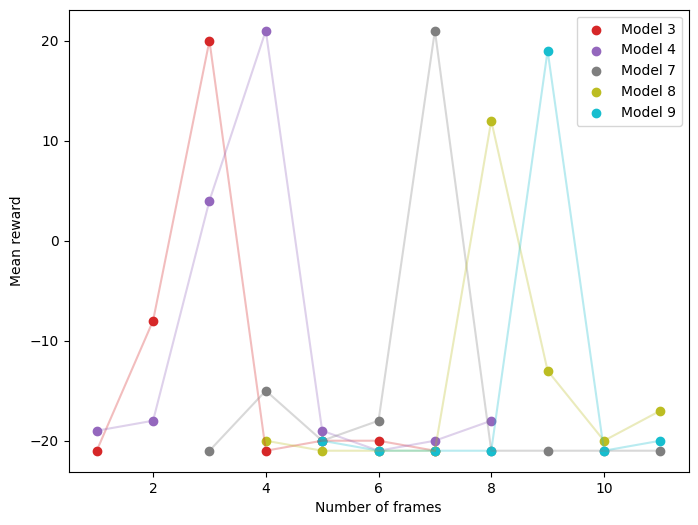

In [27]:
import torch
import collections
import numpy as np
import matplotlib.pyplot as plt

def play_games(model_path: str, frame_skips: list, num_games: int) -> list:
    env_rewards = []
    for skip in frame_skips:
        env = wrappers_skips.make_env("PongNoFrameskip-v4", skip)
        env.seed(42)
        net = dqn_model.DQN(env.observation_space.shape, env.action_space.n)
        net.load_state_dict(torch.load(model_path.format(skip), map_location=lambda storage, loc: storage))

        total_rewards = []
        for i in range(num_games):
            obs = env.reset()
            done = False
            total_reward = 0.0
            while not done:
                obs_v = torch.tensor([obs])
                q_v = net(obs_v)
                act_v = q_v.argmax(dim=1)
                action = int(act_v.item())
                obs, reward, done, _ = env.step(action)
                total_reward += reward
            total_rewards.append(total_reward)
        mean_reward = np.mean(total_rewards)
        env_rewards.append(mean_reward)
        print(f"Model {model_path} with frame skip {skip}: {mean_reward:.2f}")

    return env_rewards

model_pattern = "PongNoFrameskip-v4-skip{}.dat"
frame_skips = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
models_to_test = [3, 4, 7, 8, 9]
num_games = 1

# Collect mean rewards for each model and frame skip value
mean_rewards = collections.defaultdict(list)
for model in models_to_test:
    model_path = model_pattern.format(model)
    train_frame_skip = model  # The training frame skip is the model number itself
    test_frame_skips = [i for i in frame_skips if abs(i - train_frame_skip) <= 4]  # Only test frame skips within 3 of the training frame skip
    model_rewards = play_games(model_path, test_frame_skips, num_games)
    for i, skip in enumerate(test_frame_skips):
        mean_reward = model_rewards[i]
        mean_rewards[model].append(mean_reward)

# Plot mean rewards for each model as a function of frame skip
plt.figure(figsize=(8, 6))
for model in models_to_test:
    train_frame_skip = model
    test_frame_skips = [i for i in frame_skips if abs(i - train_frame_skip) <= 4]
    color = f"C{model}"  # Use a different color for each model
    plt.scatter(test_frame_skips, mean_rewards[model], label=f"Model {model}", color=color)
    plt.plot(test_frame_skips, mean_rewards[model], alpha=0.3, color=color)
plt.xlabel("Number of frames")
plt.ylabel("Mean reward")
plt.legend()
plt.show()
